In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Thu thập và tiền xử lý dữ liệu

## Thu thập dữ liệu

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

## Thông tin chung về dataset

**Hiển thị ra 5 cột đầu của dataset**

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dữ liệu này liên quan đến các bệnh nhân nữ từ 21 tuổi trở lên, thuộc di sản Pima Indian, với mục tiêu dự đoán nguy cơ tiểu đường. Dưới đây là giải thích các thuộc tính:

* Pregnancies (Số lần mang thai): Số lần bệnh nhân mang thai. Thuộc tính này có thể liên quan đến nguy cơ tiểu đường do thay đổi nội tiết khi mang thai.

* Glucose (Nồng độ glucose huyết tương): Đo nồng độ glucose trong máu sau 2 giờ thực hiện bài kiểm tra dung nạp glucose đường uống (mg/dL). Giá trị cao có thể là dấu hiệu của tiểu đường.

* BloodPressure (Huyết áp tâm trương): Huyết áp tâm trương (mm Hg), phản ánh áp lực máu khi tim nghỉ giữa các nhịp đập. Huyết áp cao thường liên quan đến nguy cơ tiểu đường và bệnh tim mạch.

* SkinThickness (Độ dày nếp gấp da vùng bắp tay sau): Đo độ dày lớp da ở vùng bắp tay sau (mm), phản ánh lượng mỡ dưới da. Giá trị cao có thể liên quan đến béo phì, một yếu tố nguy cơ của tiểu đường.

* Insulin (Insulin huyết thanh 2 giờ): Nồng độ insulin trong máu sau 2 giờ (mu U/ml). Giá trị này giúp đánh giá khả năng sản xuất insulin của cơ thể, có thể bất thường ở bệnh nhân tiểu đường.

* BMI (Chỉ số khối cơ thể): Tính bằng công thức trọng lượng (kg) / (chiều cao (m))^2. BMI cao (béo phì) là yếu tố nguy cơ chính của tiểu đường loại 2.

* DiabetesPedigreeFunction (Hàm phả hệ tiểu đường): Một chỉ số đo lường nguy cơ di truyền của tiểu đường dựa trên tiền sử gia đình. Giá trị cao cho thấy nguy cơ di truyền lớn hơn.

* Age (Tuổi): Tuổi của bệnh nhân (tính bằng năm). Tuổi cao thường làm tăng nguy cơ tiểu đường loại 2 do sự suy giảm chức năng cơ thể.

* Outcome (Kết quả): Biến phân loại (0 hoặc 1), trong đó 0 là không bị tiểu đường, 1 là có tiểu đường. Đây là biến mục tiêu để dự đoán.

**Số hàng, số cột dữ liệu**

Số chiều quá lớn có thể khiến mô hình khó học

Giải pháp: Giảm chiều dữ liệu
* Feature Extraction: Trích xuất đặc trưng: Tạo ra các đặc trưng mới từ các đặc trưng cũ => giảm chiều dữ liệu
* Feature Selection: Chọn lọc đặc trưng: giữ lại đặc trưng quan trọng nhất, bỏ đặc trưng gây nhiễu

In [4]:
diabetes_dataset.shape

(768, 9)

Dữ liệu này không có quá nhiều dữ liệu => không cần giảm chiều

**Thông tin chung về dataset**

Phương thức info() của một DataFrame sẽ hiển thị ra thông tin tóm tắt về:
* Tên cột
* Số giá trị không bị khuyết thiếu
* Kiểu dữ liệu của cột
* Dung lượng


In [5]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Thông tin thống kê của dữ liệu**

Phương thức describe của DataFrame hiển thị ra thông tin của các trường dữ liệu:
* Số lượng
* Trung bình
* Độ lệch chuẩn
* min
* 25%: Phân vị thứ 25 (dữ liệu ở dưới mức này chiếm 25%).
* 50% (median): Phân vị thứ 50, hay còn gọi là trung vị.
* 75%: Phân vị thứ 75 (dữ liệu ở dưới mức này chiếm 75%).
* max

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Chia tập dữ liệu

Chia dữ liệu theo chiến lược lấy mẫu phân tầng (Stratified Sampling)

In [7]:
X = diabetes_dataset.drop(['Outcome'], axis= 1)
y = diabetes_dataset['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

## Kiểm tra dữ liệu

### **Kiểm tra dữ liệu bị khuyết thiếu**

In [9]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **Kiểm tra tương quan**

In [10]:
correlation = diabetes_dataset.corr(numeric_only= True)

<Axes: >

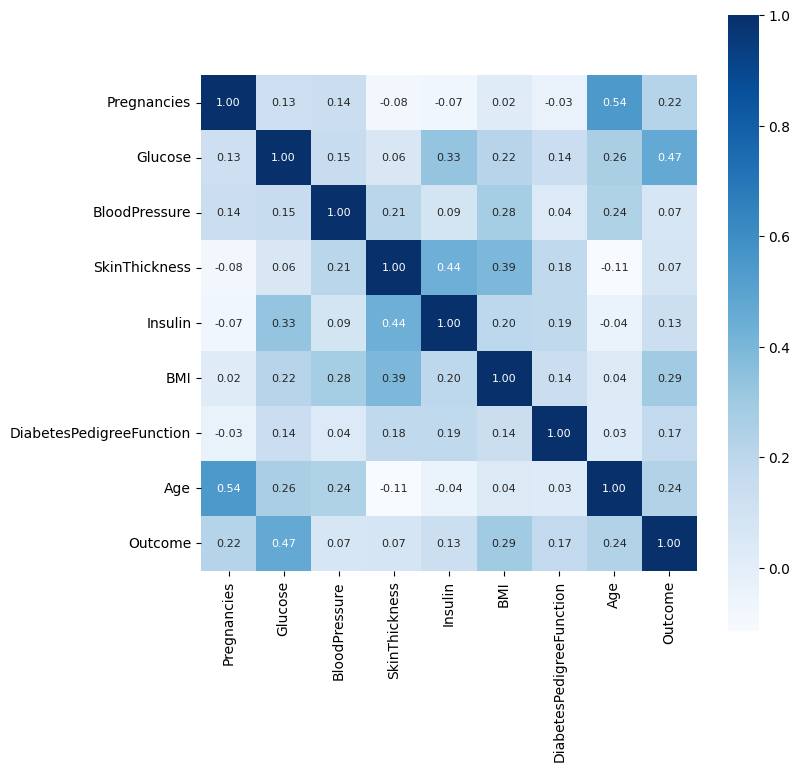

In [11]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, 
            cbar= True, 
            square= True, 
            fmt= '.2f', 
            annot= True, 
            annot_kws= {'size': 8}, 
            cmap= 'Blues')

Không có cặp thuộc tính nào quá tương quan với nhau

### **Kiểm tra ngoại lai**

Thực hiện kiểm tra ngoại lai trên tập dữ liệu huấn luyện

#### Kiểm tra ngoại lai sử dụng **IQR (Interquartile Range)**:
* Xác định Q1 (tứ phân vị thứ nhất): Giá trị ở vị trí 25% của dữ liệu (phân vị 25).
* Xác định Q3 (tứ phân vị thứ ba): Giá trị ở vị trí 75% của dữ liệu (phân vị 75).
* Tính IQR = Q3 - Q1.

Ý nghĩa:
* IQR biểu thị khoảng cách giữa 50% dữ liệu ở giữa, loại bỏ ảnh hưởng của các giá trị cực đại hoặc cực tiểu.
* Thường được dùng để xác định ngoại lai: Dữ liệu nằm ngoài khoảng [Q1 - 1.5IQR, Q3 + 1.5IQR] được coi là ngoại lai.

#### Sử dụng **biểu đồ hộp (boxplot)** để phát hiện ngoại lai:

Các thành phần chính trong biểu đồ cột:
* **Hộp:**
  * Đại diện cho khoảng tứ phân vị (IQR), là khoảng cách giữa Q1 (tứ phân vị thứ nhất, 25% dưới) và Q3 (tứ phân vị thứ ba, 75% trên).
  * Hộp chứa 50% dữ liệu ở giữa, cho thấy độ phân tán của phần trung tâm của tập dữ liệu.
* **Đường giữa hộp:**
  * Là giá trị Q2 (tứ phân vị thứ hai, 50%), tức là giá trị trung tâm của dữ liệu.
  * Nếu trung vị gần Q1 hơn Q3, dữ liệu lệch phải (skewed right); nếu gần Q3 hơn Q1, dữ liệu lệch trái (skewed left).
* **Râu (Whiskers):**
  * Là các đường kéo dài từ hai đầu của hộp, thể hiện phạm vi dữ liệu không phải ngoại lai.
  * Râu dưới kéo dài từ Q1 đến giá trị nhỏ nhất trong khoảng [Q1 - 1.5*IQR, Q1].
  * Râu trên kéo dài từ Q3 đến giá trị lớn nhất trong khoảng [Q3, Q3 + 1.5*IQR].
* **Ngoại lai (Outliers):**
  * Là các điểm dữ liệu nằm ngoài khoảng [Q1 - 1.5IQR, Q3 + 1.5IQR], thường được biểu diễn bằng các chấm hoặc ký hiệu riêng.
  * Những điểm này cho thấy các giá trị bất thường trong tập dữ liệu.

In [12]:
train_data = X_train.copy()
train_data['Outcome'] = y_train

#### Thử xử lý ngoại lai với cột BMI:

In [13]:

group_0 = train_data[train_data['Outcome'] == 0].copy()
group_1 = train_data[train_data['Outcome'] == 1].copy()

Q1_0 = group_0['BMI'].quantile(0.25)
Q3_0 = group_0['BMI'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0
print(f"Q1_0 = {Q1_0}, Q3_0 = {Q3_0}, IQR_0 = {IQR_0}")
upper_bound_0 = Q3_0 + 1.5*IQR_0
lower_bound_0 = max(Q1_0 - 1.5*IQR_0, 0)

print(f"upper_bound_0 = {upper_bound_0}, lower_bound_0 = {lower_bound_0}")

# Xử lý ngoại lai trên nhãn Outcome = 1
# Tính Q1, Q3 và IQR
Q1_1 = group_1['BMI'].quantile(0.25)
Q3_1 = group_1['BMI'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

# Tính các giá trị biên
upper_bound_1 = Q3_1 + 1.5*IQR_1
lower_bound_1 = max(Q1_1 - 1.5*IQR_1, 0)
print(f"upper_bound_1 = {upper_bound_1}, lower_bound_1 = {lower_bound_1}")


Q1_0 = 25.475, Q3_0 = 34.925, IQR_0 = 9.449999999999996
upper_bound_0 = 49.099999999999994, lower_bound_0 = 11.300000000000008
upper_bound_1 = 51.45000000000001, lower_bound_1 = 18.449999999999996


In [14]:
outliers_0 = group_0[(group_0['BMI'] > upper_bound_0) | (group_0['BMI'] < lower_bound_0)]

In [15]:
outliers_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
684,5,136,82,0,0,0.0,0.640,69,0
673,3,123,100,35,240,57.3,0.880,22,0
522,6,114,0,0,0,0.0,0.189,26,0
426,0,94,0,0,0,0.0,0.256,25,0
145,0,102,75,23,0,0.0,0.572,21,0
49,7,105,0,0,0,0.0,0.305,24,0
371,0,118,64,23,89,0.0,1.731,21,0


In [16]:
outliers_1 = group_1[(group_1['BMI'] > upper_bound_1) | (group_1['BMI'] < lower_bound_1)]

In [17]:
outliers_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
706,10,115,0,0,0,0.0,0.261,30,1
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
303,5,115,98,0,0,52.9,0.209,28,1
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1


#### Chiến lược xử lý ngoại lai:

Thay thế tất cả giá trị ngoại lai bằng giá trị biên

In [18]:
def handle_outlier(diabetes_dataset: pd.DataFrame) -> pd.DataFrame:
    data_after_process_outliers = diabetes_dataset.copy()

    # Lấy tất cả các cột để xử lý ngoại lai
    columns = [col for col in diabetes_dataset.columns if col != 'Outcome']

    # Chia nhãn để xử lý ngoại lai
    group_0 = data_after_process_outliers[data_after_process_outliers['Outcome'] == 0].copy()
    group_1 = data_after_process_outliers[data_after_process_outliers['Outcome'] == 1].copy()

    # Xử lý ngoại lai trên từng cột
    for column in columns:
        # Xử lý ngoại lai trên nhãn Outcome = 0
        # Tính Q1, Q3 và IQR
        Q1_0 = group_0[column].quantile(0.25)
        Q3_0 = group_0[column].quantile(0.75)
        IQR_0 = Q3_0 - Q1_0

        # Tính các giá trị biên
        upper_bound_0 = Q3_0 + 1.5*IQR_0
        lower_bound_0 = max(Q1_0 - 1.5*IQR_0, 0)

        # Thay thế các giá trị ngoại lai bằng giá trị biên
        group_0[column] = np.where(
            group_0[column] < lower_bound_0, lower_bound_0,
            np.where(group_0[column] > upper_bound_0, upper_bound_0,
            group_0[column])
        )
        # np.where(condition, value_if_True, value_if_False)

        # Xử lý ngoại lai trên nhãn Outcome = 1
        # Tính Q1, Q3 và IQR
        Q1_1 = group_1[column].quantile(0.25)
        Q3_1 = group_1[column].quantile(0.75)
        IQR_1 = Q3_1 - Q1_1

        # Tính các giá trị biên
        upper_bound_1 = Q3_1 + 1.5*IQR_1
        lower_bound_1 = max(Q1_1 - 1.5*IQR_1, 0)

        # Thay thế các giá trị ngoại lai bằng giá trị biên
        group_1[column] = np.where(
            group_1[column] < lower_bound_1, lower_bound_1,
            np.where(group_1[column] > upper_bound_1, upper_bound_1,
            group_1[column])
        )
        # np.where(condition, value_if_True, value_if_False)
    
    # Gộp lại dữ liệu
    data_after_process_outliers = pd.concat([group_0, group_1])
    
    return data_after_process_outliers

In [19]:
train_data_bar = handle_outlier(train_data)

#### Double check

In [20]:
train_data.loc[673]

Pregnancies                   3.00
Glucose                     123.00
BloodPressure               100.00
SkinThickness                35.00
Insulin                     240.00
BMI                          57.30
DiabetesPedigreeFunction      0.88
Age                          22.00
Outcome                       0.00
Name: 673, dtype: float64

In [21]:
train_data_bar.loc[673]

Pregnancies                   3.00
Glucose                     123.00
BloodPressure               100.00
SkinThickness                35.00
Insulin                     240.00
BMI                          49.10
DiabetesPedigreeFunction      0.88
Age                          22.00
Outcome                       0.00
Name: 673, dtype: float64

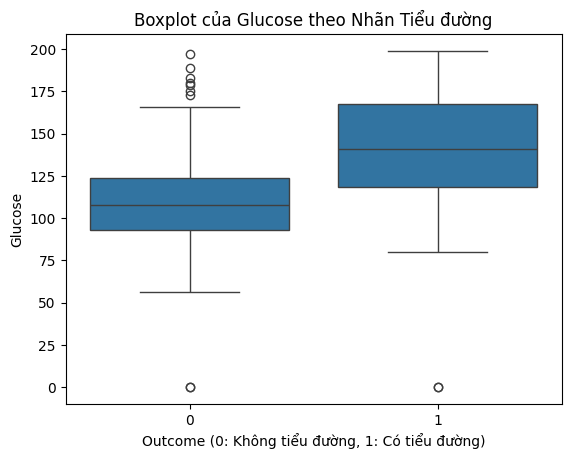

In [22]:
sns.boxplot(x='Outcome', y='Glucose', data=train_data)
plt.title('Boxplot của Glucose theo Nhãn Tiểu đường')
plt.xlabel('Outcome (0: Không tiểu đường, 1: Có tiểu đường)')
plt.ylabel('Glucose')
plt.show()

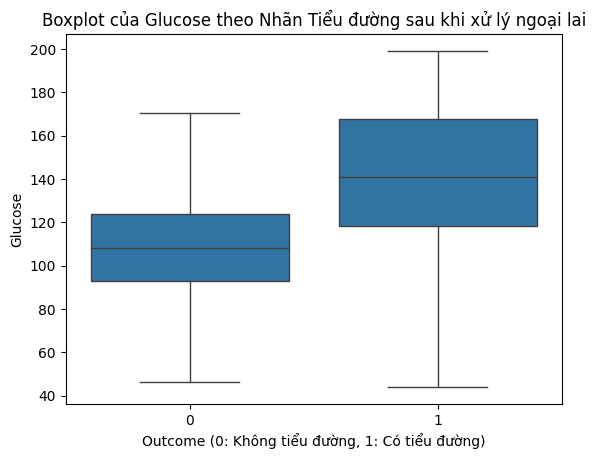

In [23]:
sns.boxplot(x='Outcome', y='Glucose', data=train_data_bar)
plt.title('Boxplot của Glucose theo Nhãn Tiểu đường sau khi xử lý ngoại lai')
plt.xlabel('Outcome (0: Không tiểu đường, 1: Có tiểu đường)')
plt.ylabel('Glucose')
plt.show()

In [24]:
train_data = train_data_bar.copy()
train_data = train_data.sort_index(ascending= True)

In [25]:
X_train = train_data.drop('Outcome', axis= 1)
y_train = train_data['Outcome']

## Chuẩn hóa dữ liệu

normalization: min-max scaling 

standardization: z-score normalization (phân phối chuẩn)

In [26]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
4,0.0,137.0,42.0,35.0,168.0,43.1,1.404875,33.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201000,30.0
...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403000,43.0
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142000,33.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340000,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245000,30.0


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[ 0.67288074,  0.88743371,  0.0853899 , ...,  0.21122495,
         0.55766046,  1.49650483],
       [-0.8572999 , -1.18856707, -0.35877021, ..., -0.78176911,
        -0.39555302, -0.19091199],
       [ 1.28495299,  2.04076748, -0.50682358, ..., -1.24989489,
         0.7130757 , -0.10210058],
       ...,
       [-0.55126377,  0.03067149, -0.06266347, ...,  0.66516509,
        -0.43354342, -0.54615764],
       [ 0.36684461, -0.00228091,  0.0853899 , ..., -0.83851163,
        -0.76164226, -0.2797234 ],
       [-0.8572999 ,  0.16248106, -0.80293033, ..., -0.28527208,
        -0.40246037,  1.2300706 ]], shape=(614, 8))

In [29]:
X_test

array([[ 0.97891686,  1.24991004, -0.50682358, ..., -0.66828408,
        -0.59241233,  0.60839072],
       [ 1.89702524, -1.74875775,  2.60229722, ...,  0.48075191,
        -0.62349538,  1.2300706 ],
       [-0.55126377,  0.03067149,  0.38149665, ...,  0.53749442,
         0.06033169, -0.63496905],
       ...,
       [-0.55126377, -1.28742425, -1.39514381, ..., -0.51224215,
         4.25999689, -0.72378046],
       [ 0.06080848,  2.07371987,  0.52955002, ...,  0.69353635,
        -0.69602249, -0.19091199],
       [-0.8572999 , -1.64990057,  0.52955002, ...,  0.15448243,
        -0.15034231, -1.07902611]], shape=(154, 8))

## Kiểm tra cân bằng dữ liệu

Các phương pháp xử lý imblanced data:
* Đổi metrics
* Undersampling
  * Random Undersampling: Lấy ngẫu nhiên số lượng sample thuộc lớp đa số bằng với tổng số lượng sample thuộc lớp thiểu số
    * Nhược điểm: có thể bỏ qua các sample quan trọng
  * NearMiss: Bỏ đi các sample ở lớp đa số mà nằm cách xa lớp thiểu số
* Oversampling
  * Random Oversampling: Chọn ngẫu nhiên và nhân bản các sample thuộc lớp thiểu số
    * Nhược điểm: Phá vỡ phân phối dữ liệu thuộc lớp thiểu số => Overfitting
  * Cluster-Base Oversampling: Phân cụm class thiểu số, nhân bản sao cho các cụm cân bằng nhau
  * SMOTE: Nội suy để sinh ra thêm dữ liệu thuộc lớp thiểu số 
    * Nhược điểm: Có khả năng overlap hai class, không hiệu quả khi dữ liệu nhiều chiều


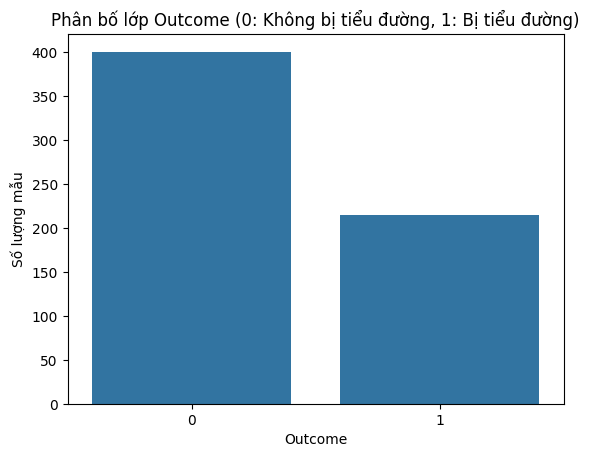

In [30]:
sns.countplot(x='Outcome', data=train_data)
plt.title('Phân bố lớp Outcome (0: Không bị tiểu đường, 1: Bị tiểu đường)')
plt.xlabel('Outcome')
plt.ylabel('Số lượng mẫu')
plt.show()

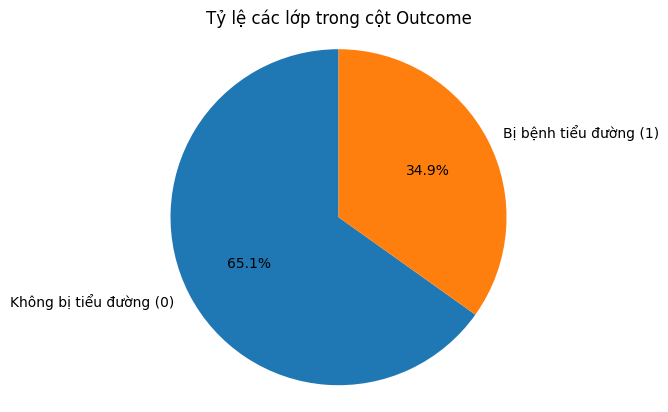

In [31]:
outcome_counts = train_data['Outcome'].value_counts()

# Vẽ biểu đồ tròn
plt.pie(outcome_counts, labels=['Không bị tiểu đường (0)', 'Bị bệnh tiểu đường (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ các lớp trong cột Outcome')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

### Cân bằng dữ liệu sử dụng SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state= 42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_sm.shape, y_sm.shape

((800, 8), (800,))

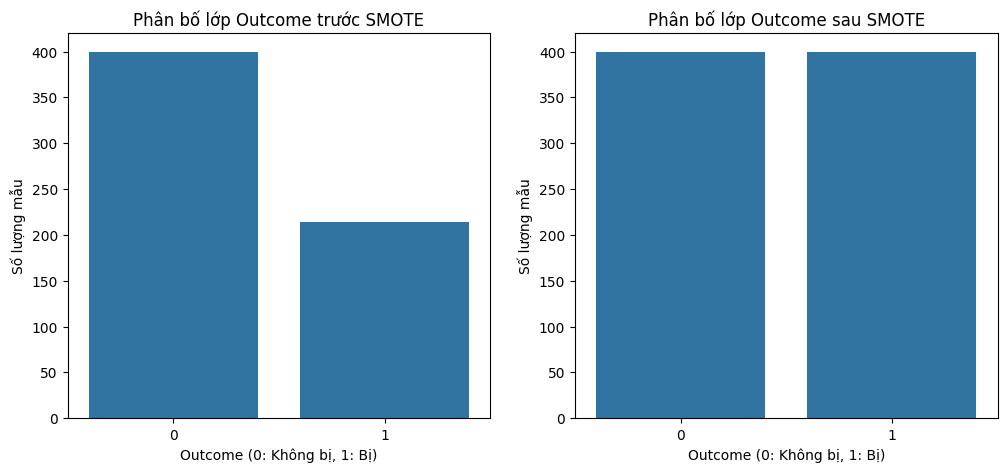

In [34]:
y_series = pd.Series(y_train, name='Outcome')
y_sm_series = pd.Series(y_sm, name='Outcome')
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

sns.countplot(x=y_series, ax=axes[0])
axes[0].set_title('Phân bố lớp Outcome trước SMOTE')
axes[0].set_xlabel('Outcome (0: Không bị, 1: Bị)')
axes[0].set_ylabel('Số lượng mẫu')

sns.countplot(x=y_sm_series, ax=axes[1])
axes[1].set_title('Phân bố lớp Outcome sau SMOTE')
axes[1].set_xlabel('Outcome (0: Không bị, 1: Bị)')
axes[1].set_ylabel('Số lượng mẫu')


plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [36]:
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



In [38]:
model = LogisticRegression()
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
           1       0.61      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.75      0.75       154



### Cân bằng dữ liệu sử dụng SMOTE-ENN

In [39]:
from imblearn.combine import SMOTEENN

In [40]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [41]:
sme = SMOTEENN(random_state= 42)
X_sme, y_sme = sme.fit_resample(X_train, y_train)
X_sme.shape, y_sme.shape

((460, 8), (460,))

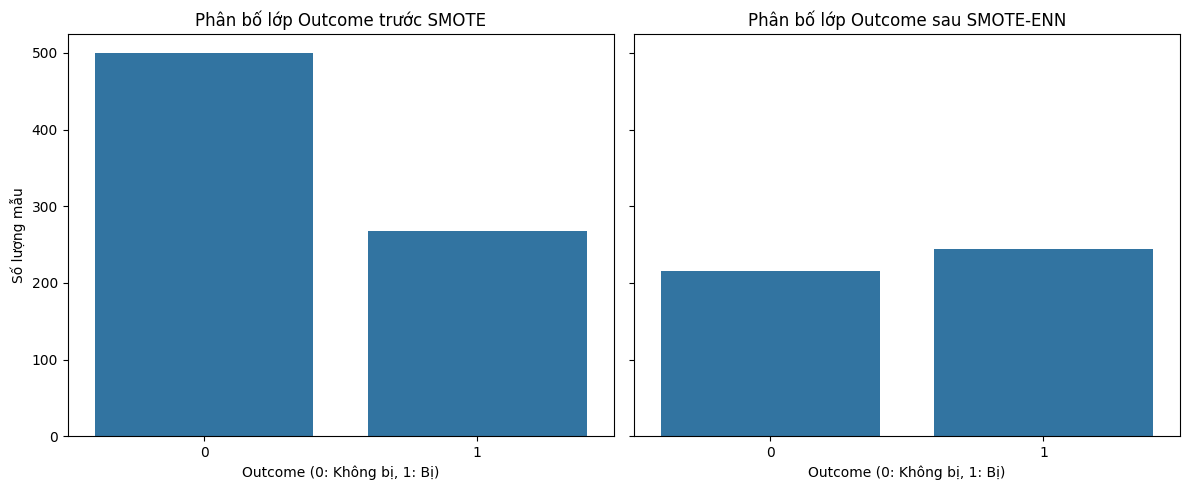

In [42]:
y_series = pd.Series(y, name='Outcome')
y_sme_series = pd.Series(y_sme, name='Outcome')
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x=y_series, ax=axes[0])
axes[0].set_title('Phân bố lớp Outcome trước SMOTE')
axes[0].set_xlabel('Outcome (0: Không bị, 1: Bị)')
axes[0].set_ylabel('Số lượng mẫu')

sns.countplot(x=y_sme_series, ax=axes[1])
axes[1].set_title('Phân bố lớp Outcome sau SMOTE-ENN')
axes[1].set_xlabel('Outcome (0: Không bị, 1: Bị)')
axes[1].set_ylabel('Số lượng mẫu')

plt.tight_layout()
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [44]:
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))


In [45]:
model = LogisticRegression()
model.fit(X_sme, y_sme)
y_pred = model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       100
           1       0.59      0.80      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



# Huấn luyện mô hình

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

### Thử với dữ liệu gốc

In [48]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator= KNeighborsClassifier(),
                           param_grid= param_grid,
                            scoring= make_scorer(f1_score, average = 'weighted'),
                            cv= 10)
grid_search.fit(X_train, y_train)

print("Best param: ", grid_search.best_params_)

knn_model = grid_search.best_estimator_

y_pred = knn_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       100
           1       0.66      0.50      0.57        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



### Thử với SMOTE

In [49]:
# Thiết lập danh sách tham số cần tối ưu
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=make_scorer(f1_score, average = 'weighted'))
grid_search.fit(X_sm, y_sm)

print("Best param: ", grid_search.best_params_)
print("Best cross validation score: ", grid_search.best_score_)

Best param:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross validation score:  0.8227734343240846


In [50]:
knn_model = grid_search.best_estimator_
y_pred = knn_model.predict(X_test)
print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       100
           1       0.54      0.72      0.62        54

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



### Thử với SMOTE-ENN

In [51]:
param_grid = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator= KNeighborsClassifier(),
                           param_grid= param_grid,
                            scoring= make_scorer(f1_score, average = 'weighted'),
                            cv= 10)
grid_search.fit(X_sme, y_sme)

print("Best param: ", grid_search.best_params_)

knn_model = grid_search.best_estimator_

y_pred = knn_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       100
           1       0.58      0.78      0.67        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.73       154



## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [53]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20, 25],
    #'max_features': ['auto', 'sqrt', 'log2', None]
}

### Thử với dữ liệu ban đầu

In [54]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)

dt_model= grid_search.best_estimator_

y_pred= dt_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'gini', 'max_depth': 5}
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       100
           1       0.68      0.72      0.70        54

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



### Thử với SMOTE

In [55]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_sm, y_sm)
print("Best param: ", grid_search.best_params_)

dt_model= grid_search.best_estimator_

y_pred= dt_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'gini', 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.54      0.56      0.55        54

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



### Thử với SMOTE-ENN

In [56]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_sme, y_sme)
print("Best param: ", grid_search.best_params_)

dt_model= grid_search.best_estimator_

y_pred= dt_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'gini', 'max_depth': 5}
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       100
           1       0.59      0.81      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [58]:
param_grid = {
    'n_estimators': [50, 100, 200, 250],
    'criterion': ['gini', 'entropy']
}

#### Thử với dữ liệu gốc

In [59]:
grid_search = GridSearchCV(estimator= RandomForestClassifier(),
                           param_grid= param_grid,
                           cv= 10,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           n_jobs= -1)

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)
rf_model = grid_search.best_estimator_
y_pred = rf_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'gini', 'n_estimators': 250}
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.61      0.67      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



### Thử với dữ liệu SMOTE

In [60]:
grid_search = GridSearchCV(estimator= RandomForestClassifier(),
                           param_grid= param_grid,
                           cv= 10,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           n_jobs= -1)

grid_search.fit(X_sm, y_sm)
print("Best param: ", grid_search.best_params_)
rf_model = grid_search.best_estimator_
y_pred = rf_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'gini', 'n_estimators': 250}
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       100
           1       0.59      0.69      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



### Thử với dữ liệu SMOTE-ENN

In [61]:
grid_search = GridSearchCV(estimator= RandomForestClassifier(),
                           param_grid= param_grid,
                           cv= 10,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           n_jobs= -1)

grid_search.fit(X_sme, y_sme)
print("Best param: ", grid_search.best_params_)
rf_model = grid_search.best_estimator_
y_pred = rf_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'entropy', 'n_estimators': 250}
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       100
           1       0.61      0.78      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154

